In [1]:
import numpy as np
from scipy.stats import randint

<center> РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ 

Давайте посмотрим, как можно решить задачу на равномерное распределение. Вспомним пример в одном предыдущих из юнитов, где у нас была кондитерская, в которой покупатели приобретали от одного до шести пирожных с равными вероятностями:

X	1	2	3	4	5	6
P	1/6	1/6	1/6	1/6	1/6	1/6
Пусть нас просят найти ожидаемое количество купленных пирожных и стандартное отклонение при покупке в такой равновероятной модели.

In [2]:
# Задаём возможные значения случайной величины
x = np.arange(1, 7)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 7)
# Вычисляем вероятности выпадения каждого значения случайной величины
pmf = disc_uni_dist.pmf(x)

In [3]:
pmf

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [4]:
# Рассчитаем кумулятивную вероятность
cdf = disc_uni_dist.cdf(x)

print(cdf)

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


?

Вы участвуете в розыгрыше бесплатного места на новый курс по Data Science. Вы знаете, что участников 250.

Какова вероятность, что на курс попадёт кто-то из первых пятидесяти зарегистрировавшихся?

In [5]:
# Задаём возможные значения случайной величины
x = np.arange(1, 251)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1,251)
# Вычисляем вероятности выпадения каждого значения случайной величины
cdf = disc_uni_dist.cdf(x)
# Ищем вероятность того, что на курс попадёт кто-то из первых 50 зарегистрировавшихся
print(cdf[49])

0.2


В результате получаем 0.2 — это вероятность того, что выигрыш получит кто-то, чей порядковый номер — от 1 до 50. Разумеется, вероятность не зависит от самого номера, поэтому для номеров с 51 по 100 вероятность будет ровно такая же.

<center> Распределениеи Бернулли

?

Вы стреляете по мишени в тире. Вероятность попасть составляет . В случае успеха вы выиграете плюшевого медведя стоимостью 3000 рублей, а в случае промаха — не выиграете ничего. У вас есть только один выстрел.

Какой должна быть стоимость билета, чтобы игра была честной, то есть чтобы цена билета равнялась ожидаемому выигрышу, а значит, не уводила в убыток продавца или вас при большом количестве выстрелов?

С помощью специальной функции bernoulli.rvs() из библиотеки scipy мы можем смоделировать распределение Бернулли и, например, увидеть ожидаемое соотношение попаданий и промахов для решённой задачи, если будет сделано 500 выстрелов:

C:\Users\админ\AppData\Local\Temp\ipykernel_2556\2561418568.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data,


[Text(0.5, 0, 'Значение случайной величины'), Text(0, 0.5, 'Частота')]

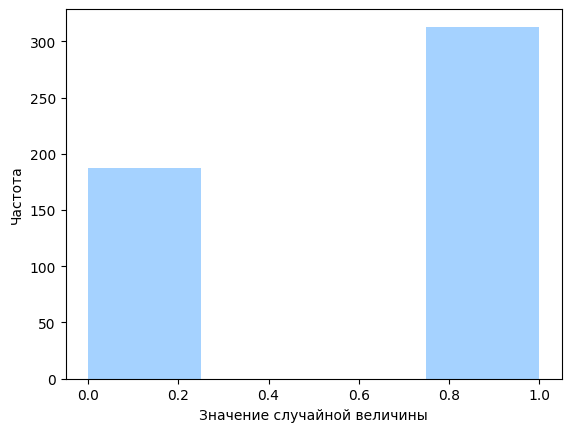

In [6]:
from scipy.stats import bernoulli
import seaborn as sns

data = bernoulli.rvs(size=500,p=0.6)
ax = sns.distplot(data,
                  kde = False,
                  color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

Также можно вывести количество неудач и попаданий в нашей модели:

In [7]:
unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 187]
 [  1 313]]


<center> Биноминальное распределение

?

Производитель гаджетов знает, что 20 % производимых им товаров — бракованные.

Если он производит десять изделий в день, какова вероятность того, что не более двух из них бракованные?

In [8]:
import scipy

scipy.stats.binom.pmf(8,10,0.8)+scipy.stats.binom.pmf(9,10,0.8)+scipy.stats.binom.pmf(10,10,0.8)

0.6777995264

Получаем, что с вероятностью 0.678 будет производиться не более двух бракованных изделий в день.

Как и для распределения Бернулли, для биномиального распределения можно смоделировать какое-то количество попыток и получить результат. Например, можно смоделировать биноминальное распределение с параметром p = 0.5 и количеством испытаний, равным 10, и реализовать 1000 попыток:

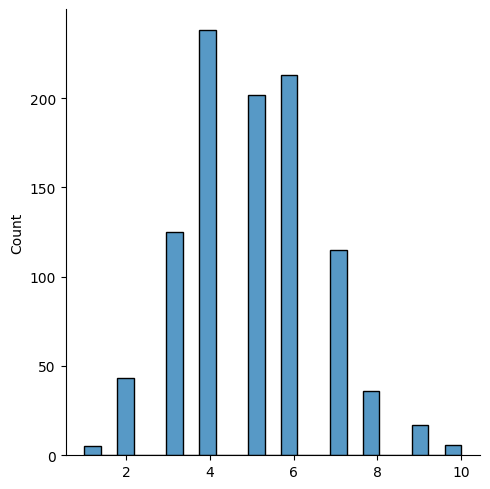

In [9]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

x = random.binomial(n=10, p=0.5, size=10)

sns.displot(random.binomial(n=10, p=0.5, size=1000))

plt.show()

Можно видеть, что чаще всего можно наблюдать пять успешных исходов.

<center> Распределение Пуассона

?

Колл-центр получает в среднем 4.5 звонка за каждые пять минут. Каждый оператор может обработать один из этих вызовов в течение пяти минут. Если вызов получен, но оператор  не может его принять, то вызывающий абонент будет переведён в режим ожидания ответа.

Если вызовы следуют распределению Пуассона, какое минимальное количество операторов необходимо колл-центру, чтобы вероятность попадания вызова на удержание была не более 0.1?

In [10]:
# для 5 операторов
import scipy

scipy.stats.distributions.poisson.pmf(5, 4.5)

0.17082685848611215

Также можно смоделировать распределение Пуассона. Например, будем рассматривать 1000 реализаций случайной величины, у которой : лямбда=3

C:\Users\админ\AppData\Local\Temp\ipykernel_2556\2227624355.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.poisson(lam=3, size=1000), kde=False)


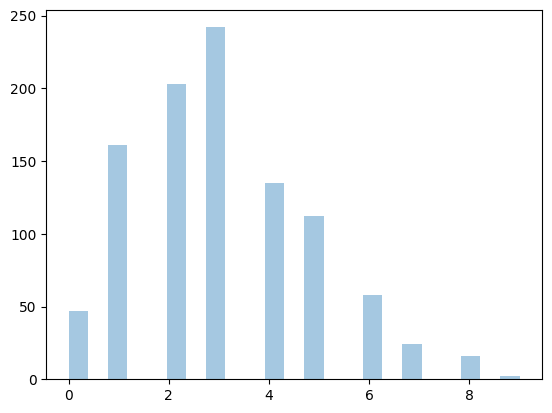

In [11]:
from numpy import random

sns.distplot(random.poisson(lam=3, size=1000), kde=False)

plt.show()

In [ ]:
from scipy.stats import bernoulli
import seaborn as sns

data = bernoulli.rvs(size=500,p=0.6)
ax = sns.distplot(data,
                  kde = False,
                  color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')